![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from livelossplot import PlotLossesKeras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


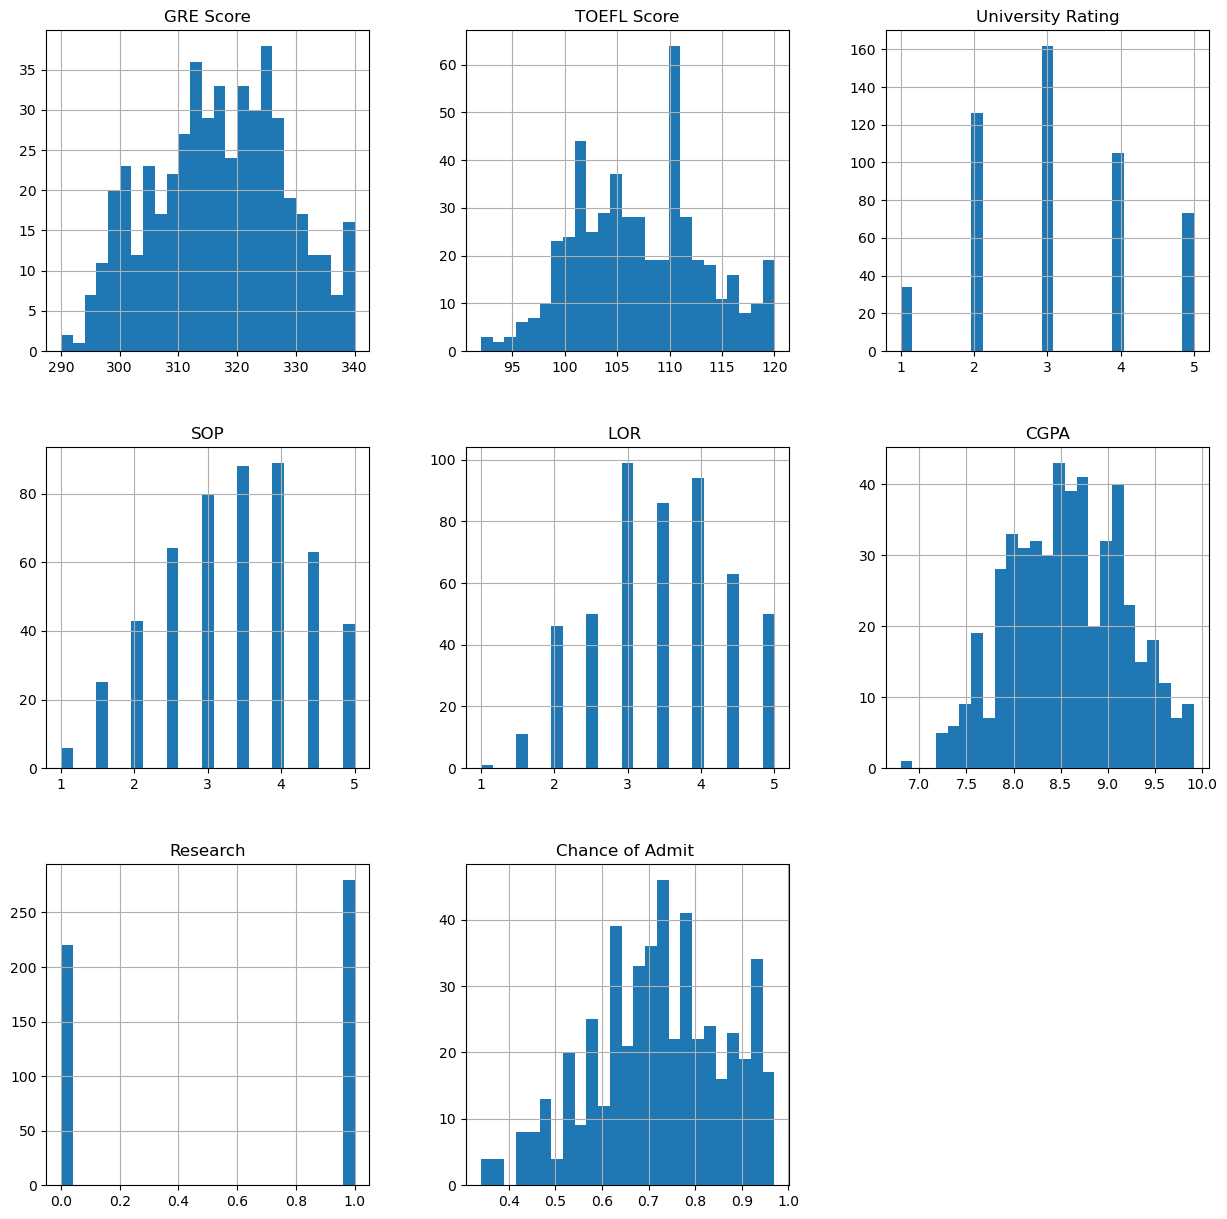

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

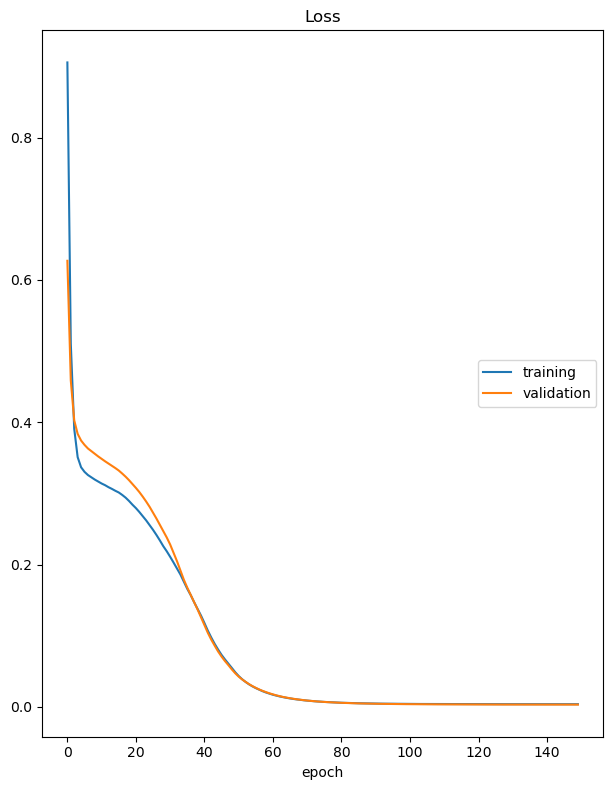

Loss
	training         	 (min:    0.004, max:    0.906, cur:    0.004)
	validation       	 (min:    0.003, max:    0.627, cur:    0.003)
5/5 [==============================] - 0s 2ms/step
El valor de MSE es: 0.0031857039801450747
El valor de MAE es: 0.041216544254620874


In [28]:
# Celda 1

Escalador = StandardScaler()
xTrain_Scaled = Escalador.fit_transform(xTrain)
xTest_Scaled = Escalador.transform(xTest)

keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=1, input_shape=(xTrain_Scaled.shape[1],),activation='relu'))

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xTrain_Scaled, yTrain, 
          verbose=1, 
          epochs=150, 
          validation_data=(xTest_Scaled, yTest),
          callbacks=[PlotLossesKeras()])

yPred = model.predict(xTest_Scaled)

MSE_metric ={}
MAE_metric ={}
MSE_metric['1 Capa'] = mean_squared_error(yTest, yPred) 
MAE_metric['1 Capa'] = mean_absolute_error(yTest, yPred)

print('El valor de MSE es: ' +str(MSE_metric['1 Capa']))
print('El valor de MAE es: ' +str(MAE_metric['1 Capa']))

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

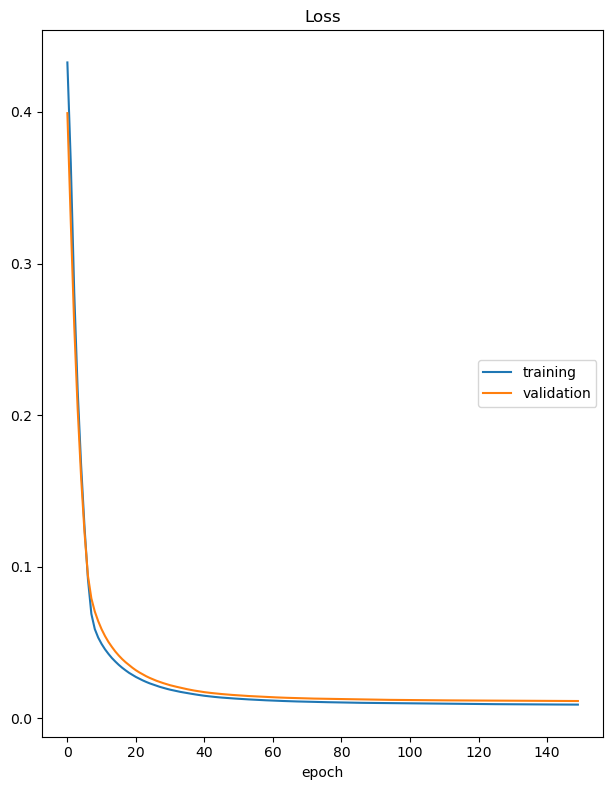

Loss
	training         	 (min:    0.009, max:    0.433, cur:    0.009)
	validation       	 (min:    0.011, max:    0.399, cur:    0.011)
5/5 [==============================] - 0s 2ms/step
El valor de MSE es: 0.011293353906587329
El valor de MAE es: 0.07976287155151368


In [35]:
# Celda 2
keras.backend.clear_session()

model = Sequential()
model.add(Dense(10, input_shape=(xTrain_Scaled.shape[1],),activation='relu'))
model.add(Dense(5, input_shape=(xTrain_Scaled.shape[1],),activation='relu'))
model.add(Dense(1,activation='relu'))

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xTrain_Scaled, yTrain, 
          verbose=1, 
          epochs=150, 
          validation_data=(xTest_Scaled, yTest),
          callbacks=[PlotLossesKeras()])

yPred = model.predict(xTest_Scaled)

MSE_metric['Multicapa'] = mean_squared_error(yTest, yPred) 
MAE_metric['Multicapa'] = mean_absolute_error(yTest, yPred)

print('El valor de MSE es: ' +str(MSE_metric['Multicapa']))
print('El valor de MAE es: ' +str(MAE_metric['Multicapa']))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


Se utiliza Relu en la capa de salida debido a que como se habla de una probabilidad entre 0 y 1 no existen valores negativos

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

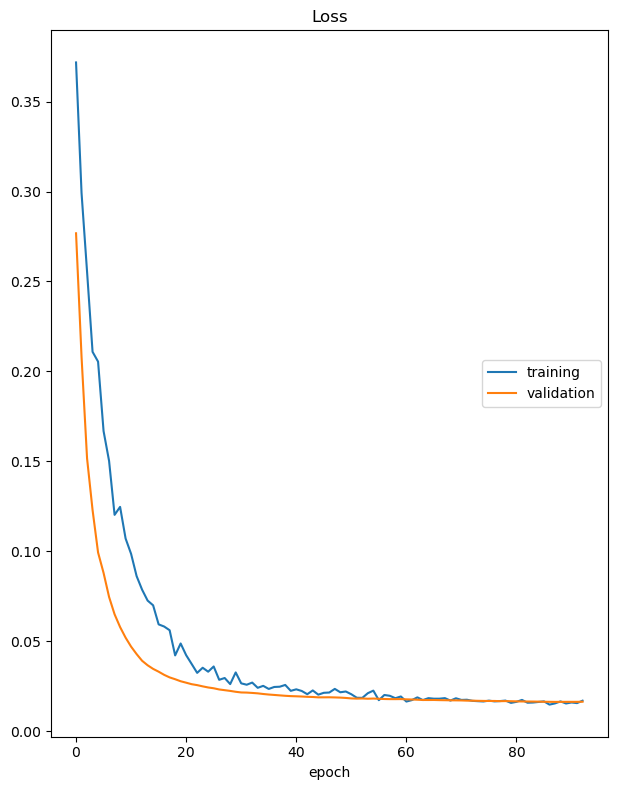

Loss
	training         	 (min:    0.015, max:    0.372, cur:    0.017)
	validation       	 (min:    0.016, max:    0.277, cur:    0.016)
11/11 [==============================] - 0s 16ms/step - loss: 0.0170 - val_loss: 0.0164
Epoch 93: early stopping
5/5 [==============================] - 0s 2ms/step
El valor de MSE es: 0.016401769903305042
El valor de MAE es: 0.0963238849480947


In [36]:
# Celda 3
keras.backend.clear_session()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1) 

model = Sequential()
model.add(Dense(10, input_shape=(xTrain_Scaled.shape[1],),activation='relu'))
model.add(Dropout(0.15)) 
model.add(Dense(5, input_shape=(xTrain_Scaled.shape[1],),activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(1,activation='relu'))

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xTrain_Scaled, yTrain, 
          verbose=1, 
          epochs=150, 
          validation_data=(xTest_Scaled, yTest),
          callbacks=[PlotLossesKeras(),early_stop])

yPred = model.predict(xTest_Scaled)


MSE_metric['MultiCapa con EarlyStop y Dropout'] = mean_squared_error(yTest, yPred) 
MAE_metric['MultiCapa con EarlyStop y Dropout'] = mean_absolute_error(yTest, yPred)

print('El valor de MSE es: ' +str(MSE_metric['MultiCapa con EarlyStop y Dropout']))
print('El valor de MAE es: ' +str(MAE_metric['MultiCapa con EarlyStop y Dropout']))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [15]:
# Celda 4
pd.DataFrame(zip(MAE_metric.values(),MSE_metric.values()),columns=['MAE','MSE'],index=MAE_metric.keys())


,MAE,MSE
1 Capa,0.040963,0.003154
Multicapa,0.051289,0.004626
MultiCapa con EarlyStop y Dropout,0.070663,0.007149
